### Wstęp do Uczenia Maszynowego 
##### Laboratorium 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 1. Selekcja zmiennych

### Zadanie 1
----
Przyjrzyj się dokumentacji funkcji `SelectFromModel()`. Wczytaj zbiór danych `SAheart.data`, podziel na zbiór treningowy i testowy w stosunku 3:2.

a) Przygotuj `pipeline`, który przygotuje model regresji logistycznej.

b) Dodaj selekcję zmiennych z wykorzystaniem `SelectFromModel()` w utworzonym `pipeline` w punkcie a). Do funkcji `SelectFromModel()` wykorzystaj model regresji logistycznej a do modelowania wykorzystaj drzewo decyzyjne.

c) Przygotuj kolejny `pipeline`, który do wyboru zmiennych zamiast funkcji `SelectFromModel()` wykorzysta funkcję `SequentialFeatureSelector()`.

In [2]:
df = pd.read_csv("SAheart.data").drop("row.names", axis=1)

In [3]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
categorical_columns = ["famhist"]
numerical_columns = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("chd", axis=1), df["chd"], test_size=0.4, random_state=42)

In [6]:
categorical_preprocessor = Pipeline([
    ("encoder", OneHotEncoder(drop="first"))
])

numerical_preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("categorical", categorical_preprocessor, categorical_columns),
    ("numerical", numerical_preprocessor, numerical_columns)
])

In [7]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('classifier', LogisticRegression())])

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('classifier', LogisticRegression())])

In [9]:
pipeline.score(X_test, y_test)

0.7621621621621621

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

In [11]:
pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("selector", SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"), max_features=5)),
    ("classifier", DecisionTreeClassifier())
])

pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'),
                                 max_features=5)),
                ('classifier', DecisionTreeClassifier())])

In [12]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'),
                                 max_features=5)),
                ('classifier', DecisionTreeClassifier())])

In [13]:
pipeline2.score(X_test, y_test)

0.6594594594594595

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector

In [15]:
pipeline3 = Pipeline([
    ("preprocessor", preprocessor),
    ("selector_model", SequentialFeatureSelector(DecisionTreeClassifier())),
    ("classifier", DecisionTreeClassifier())
])

pipeline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector_model',
                 SequentialFeatureSelector(estimator=DecisionTreeClassifier())),
                ('classifier', DecisionTreeClassifier())])

In [16]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['famhist']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sbp', 'tobacco', 'ldl',
                                                   'adiposity', 'typea',
                                                   'obesity', 'alcohol',
                                                   'age'])])),
                ('selector_model',
                 SequentialFeatureSelector(estimator=DecisionTreeClassifier())),
                ('classifier', DecisionTreeClassifier())])

In [17]:
pipeline3.score(X_test, y_test)

0.5783783783783784

In [18]:
pipeline3["selector_model"].get_feature_names_out()

array(['x0', 'x1', 'x4', 'x8'], dtype=object)

### 2. PCA

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [22]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [23]:
print(sum(pca.explained_variance_ratio_))

0.6652996889318529


In [24]:
var_ratio = []
for num in np.arange(14):
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

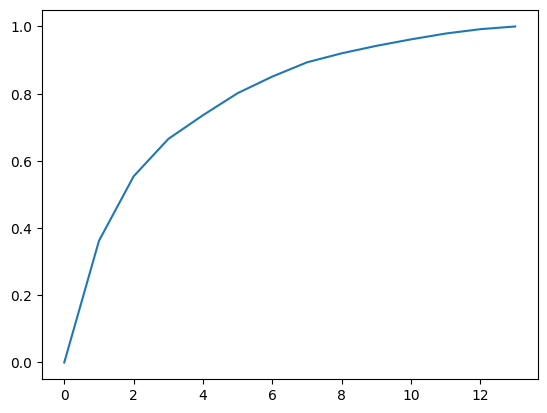

In [25]:
import seaborn as sns

sns.lineplot(x = range(scaled_df.shape[1] + 1), y = var_ratio)

### Zadanie 2
----
Wczytaj zbiór danych `pima.csv`.

a) Podziel zbiór na treningowy i testowy w proporcji 4:1.

b) Na zbiorze treningowym wyznacz komponenty uzyskane metodą PCA. Sporządź wykres, który ukazuje jaki procent wariancji jest wyjaśniany przez kolejne komponenty.

c) Dopasuj model regresji logistycznej dla danych treningowych pełnych, dla danych po PCA, dla 5 pierwszych komponentów po PCA, dla 2 pierwszych komponentów po PCA.

d) Policz dokładność na zbiorze testowym dla każego modelu z punktu c).

e) Przygotuj `pipeline` ze wszystkimi krokami dla modelu regresji logistycznej na danych po PCA i policz dokładność na zbiorze testowym.

*Wyniki punktu e) powinny być takie same jak dla drugiego modelu z punktu c)*

In [26]:
pima = pd.read_csv("pima.csv")

In [27]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X, y = pima.drop("Outcome", axis=1), pima["Outcome"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

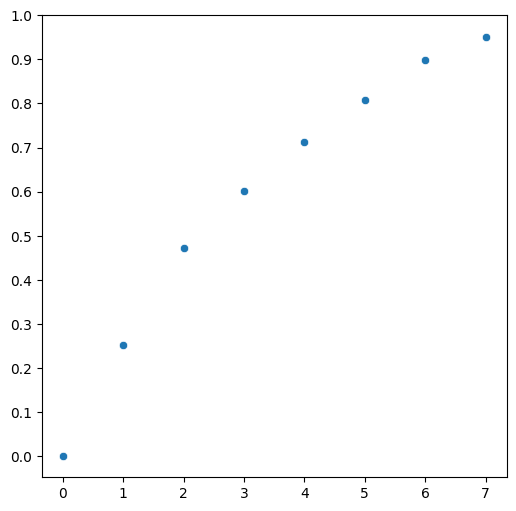

In [31]:
cumulated_variance = []

for i in range(8):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    cumulated_variance.append(np.sum(pca.explained_variance_ratio_))
  
plt.figure(figsize=(6, 6))
sns.scatterplot(cumulated_variance)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [32]:
pca2 = PCA(n_components=2)
pca2.fit(X_train)

pca5 = PCA(n_components=5)
pca5.fit(X_train)

PCA(n_components=5)

In [33]:
X_train_pca2 = pca2.transform(X_train)
X_test_pca2 = pca2.transform(X_test)
X_train_pca5 = pca5.transform(X_train)
X_test_pca5 = pca5.transform(X_test)

model = LogisticRegression(penalty="l1", solver="liblinear")

# Pierwotne dane
model.fit(X_train, y_train)
print("Accuracy na oryginalnych danych testowych:", model.score(X_test, y_test))
print("Accuracy na oryginalnych danych treningowych:", model.score(X_train, y_train))

# Dane po redukcji wymiarów do 2
model.fit(X_train_pca2, y_train)
print("Accuracy na danych po redukcji wymiarów do 2 dla danych testowych:", model.score(X_test_pca2, y_test))
print("Accuracy na danych po redukcji wymiarów do 2 dla danych treningowych:", model.score(X_train_pca2, y_train))

# Dane po redukcji wymiarów do 5
model.fit(X_train_pca5, y_train)
print("Accuracy na danych po redukcji wymiarów do 5 dla danych testowych:", model.score(X_test_pca5, y_test))
print("Accuracy na danych po redukcji wymiarów do 5 dla danych treningowych:", model.score(X_train_pca5, y_train))

Accuracy na oryginalnych danych testowych: 0.7239583333333334
Accuracy na oryginalnych danych treningowych: 0.78125
Accuracy na danych po redukcji wymiarów do 2 dla danych testowych: 0.6927083333333334
Accuracy na danych po redukcji wymiarów do 2 dla danych treningowych: 0.7326388888888888
Accuracy na danych po redukcji wymiarów do 5 dla danych testowych: 0.7083333333333334
Accuracy na danych po redukcji wymiarów do 5 dla danych treningowych: 0.7482638888888888
